In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ParisHousing.csv to ParisHousing.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler, PowerTransformer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet, SGDRegressor, LassoCV, RidgeCV, ElasticNetCV
!pip install category_encoders
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("ParisHousing.csv")
data.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [ ]:
data.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460,4.993448e+06
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641,2.877424e+06
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000,1.031350e+04
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000,2.516402e+06
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000,5.016180e+06
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000,7.469092e+06
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000,1.000677e+07


In [ ]:
data.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

No null values in the dataset

In [ ]:
X = data.drop("price", axis=1)
y = pd.DataFrame(data['price'])

In [ ]:
categ= X.dtypes == object

In [ ]:
ind_features = list(X.columns)
ind_features

['squareMeters',
 'numberOfRooms',
 'hasYard',
 'hasPool',
 'floors',
 'cityCode',
 'cityPartRange',
 'numPrevOwners',
 'made',
 'isNewBuilt',
 'hasStormProtector',
 'basement',
 'attic',
 'garage',
 'hasStorageRoom',
 'hasGuestRoom']

In [ ]:
categorical_columns = [i for i,v in categ.items() if v]
continuous_columns = [i for i,v in categ.items() if not v]

categorical_columns_index = [i for i,v in enumerate(ind_features) if(v in categorical_columns)]
continuous_columns_index = [i for i,v in enumerate(ind_features) if(v in continuous_columns)]

In [ ]:
print(categorical_columns)

[]


There are no categorical features in the dataset. Or in other words the categorical data was already encoded.

In [ ]:
print(continuous_columns)

['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom', 'hasGuestRoom']


In [ ]:
data[continuous_columns].describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.00000
mean,49870.13120,50.358400,0.508700,0.496800,50.276300,50225.486100,5.510100,5.521700,2005.48850,0.499100,0.499900,5033.103900,5028.01060,553.12120,0.503000,4.99460
std,28774.37535,28.816696,0.499949,0.500015,28.889171,29006.675799,2.872024,2.856667,9.30809,0.500024,0.500025,2876.729545,2894.33221,262.05017,0.500016,3.17641
min,89.00000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,0.000000,0.000000,1.00000,100.00000,0.000000,0.00000
25%,25098.50000,25.000000,0.000000,0.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,0.000000,0.000000,2559.750000,2512.00000,327.75000,0.000000,2.00000
50%,50105.50000,50.000000,1.000000,0.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,0.000000,0.000000,5092.500000,5045.00000,554.00000,1.000000,5.00000
75%,74609.75000,75.000000,1.000000,1.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,1.000000,1.000000,7511.250000,7540.50000,777.25000,1.000000,8.00000
max,99999.00000,100.000000,1.000000,1.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,1.000000,1.000000,10000.000000,10000.00000,1000.00000,1.000000,10.00000


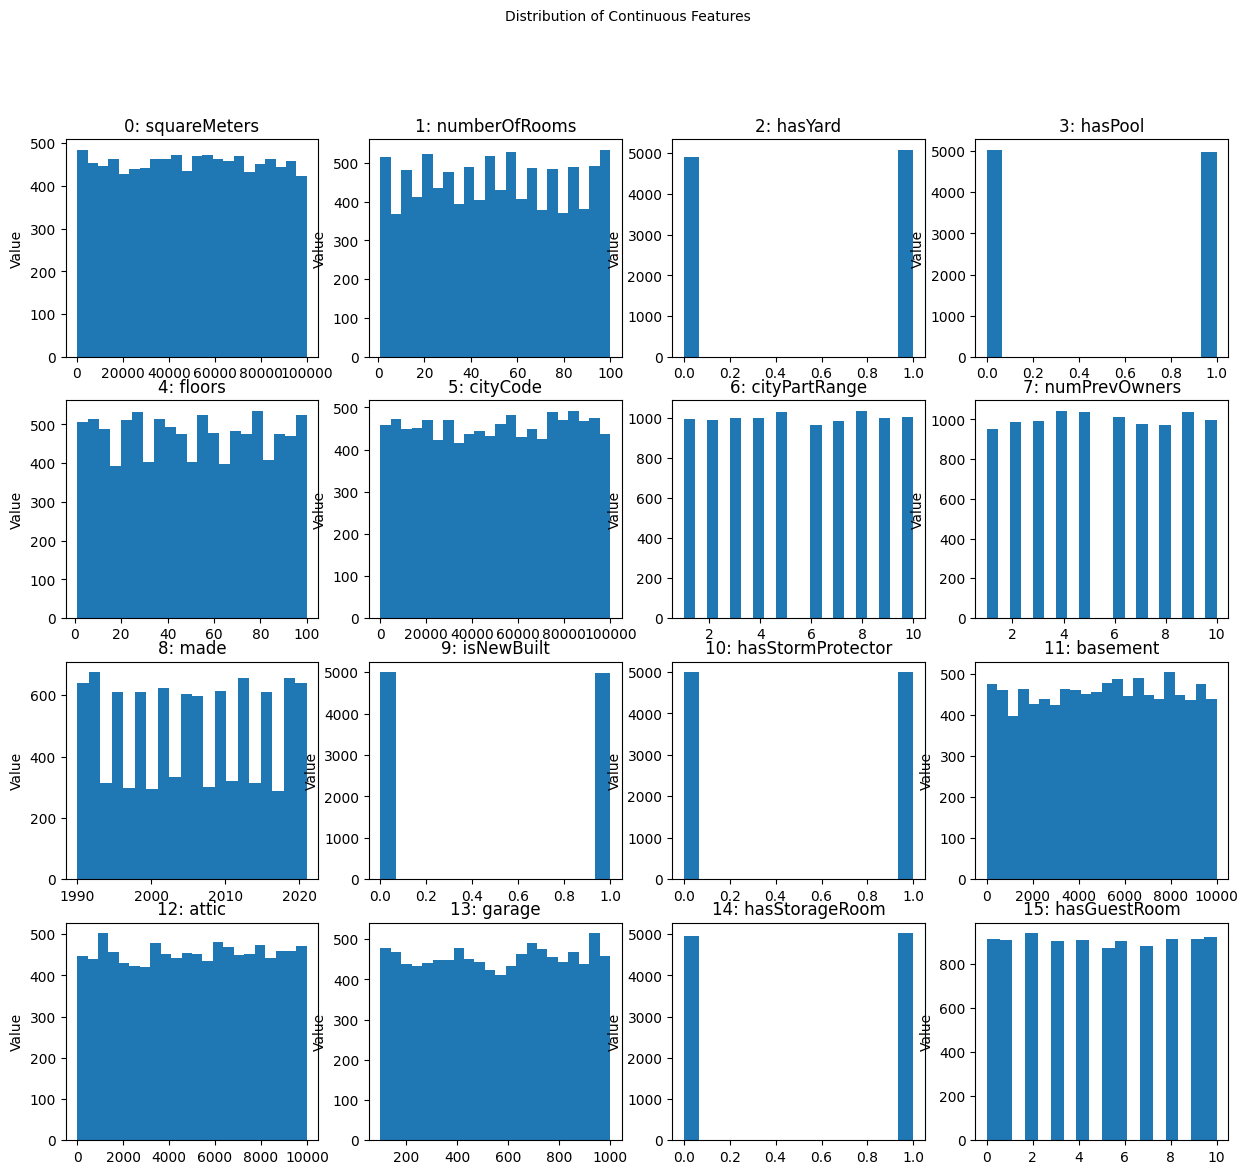

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 13))
for i, ax in enumerate(axes.ravel()):
    ax.hist(X.iloc[:,i],bins="auto")
    ax.set_title("{}: {}".format(i, continuous_columns[i]))
    ax.set_ylabel("Value")
fig.suptitle("Distribution of Continuous Features", fontsize=10)
plt.show()

From above figures we can conclude that the dataset features are not skewed and do not require any special treatment.

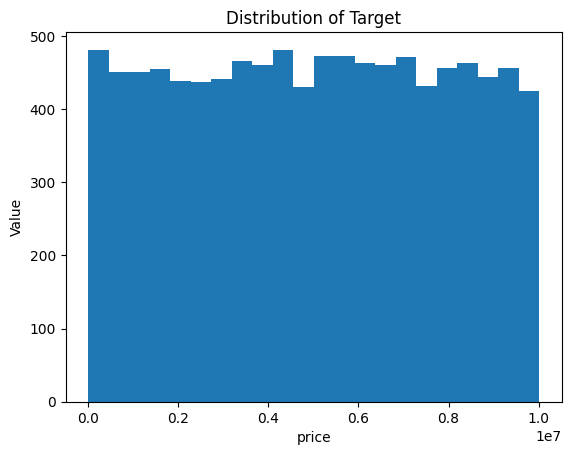

In [ ]:
plt.hist(data["price"], bins="auto")
plt.xlabel("price")
plt.ylabel("Value")
plt.title("Distribution of Target")
plt.show()

Text(0.5, 1.0, 'Pearson Correlation Coefficients')

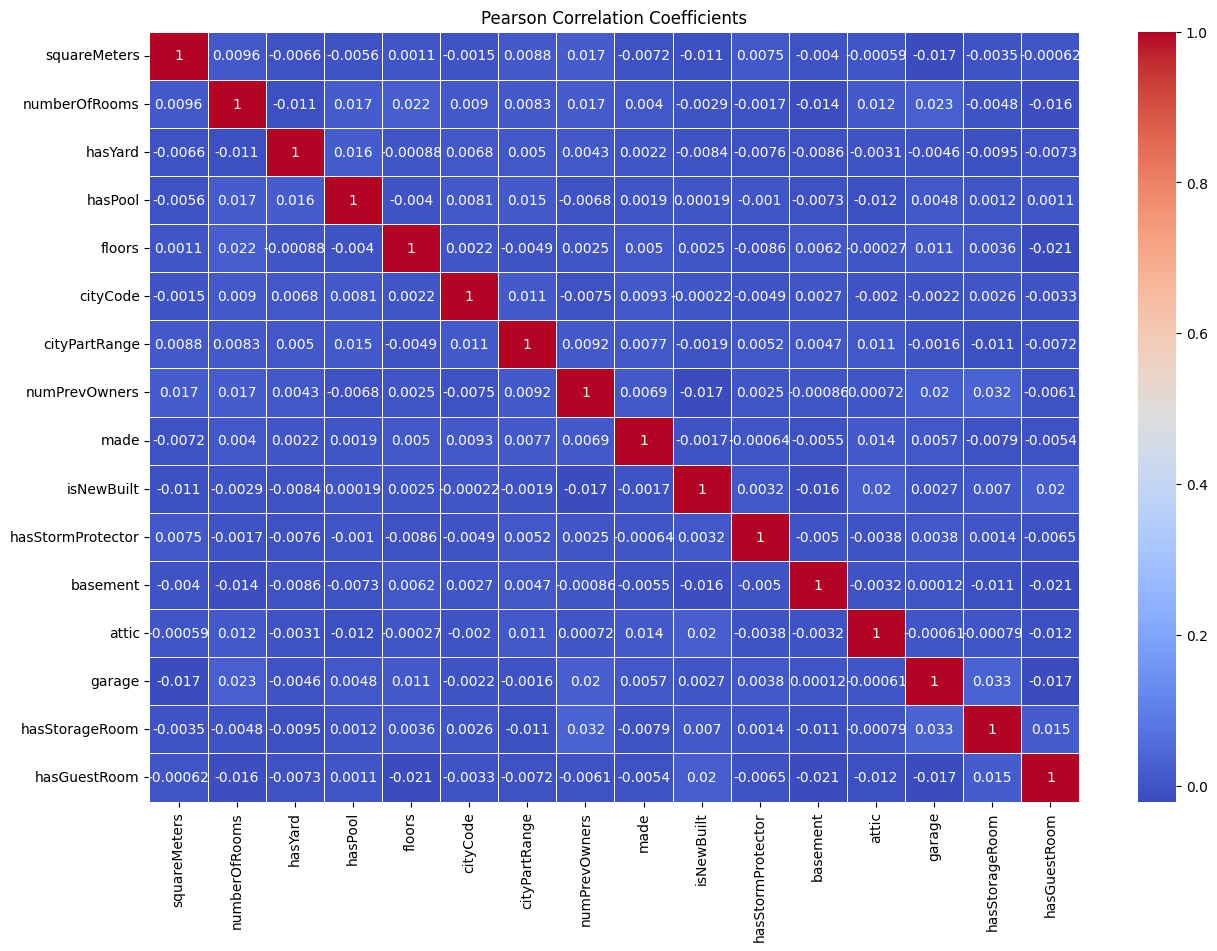

In [ ]:
correlation_matrix = data[continuous_columns].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Pearson Correlation Coefficients')

From the heatmap it is evident that no two features have high degree of correlation.

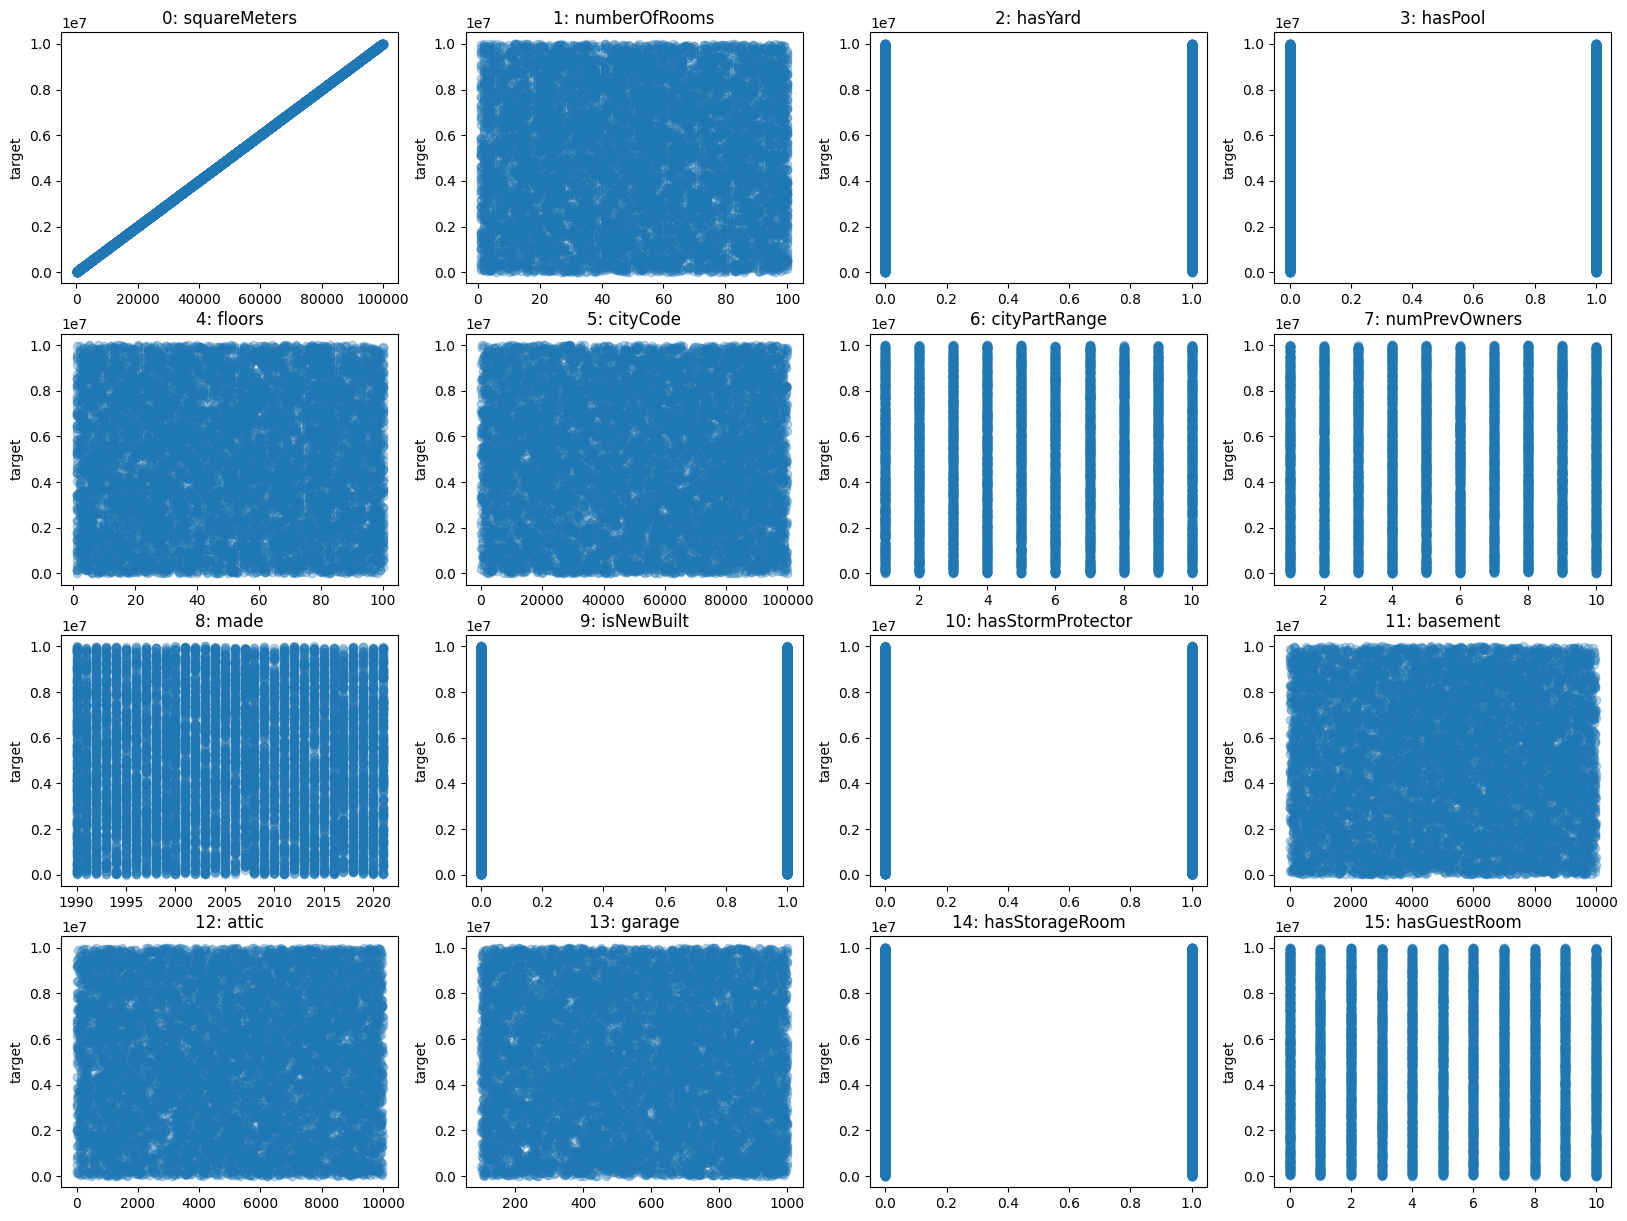

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))
for i, ax in enumerate(axes.ravel()):
    ax.plot(X.iloc[:,i], y, 'o', alpha=.3)
    ax.set_title("{}: {}".format(i, continuous_columns[i]))
    ax.set_ylabel("price")
plt.show()

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

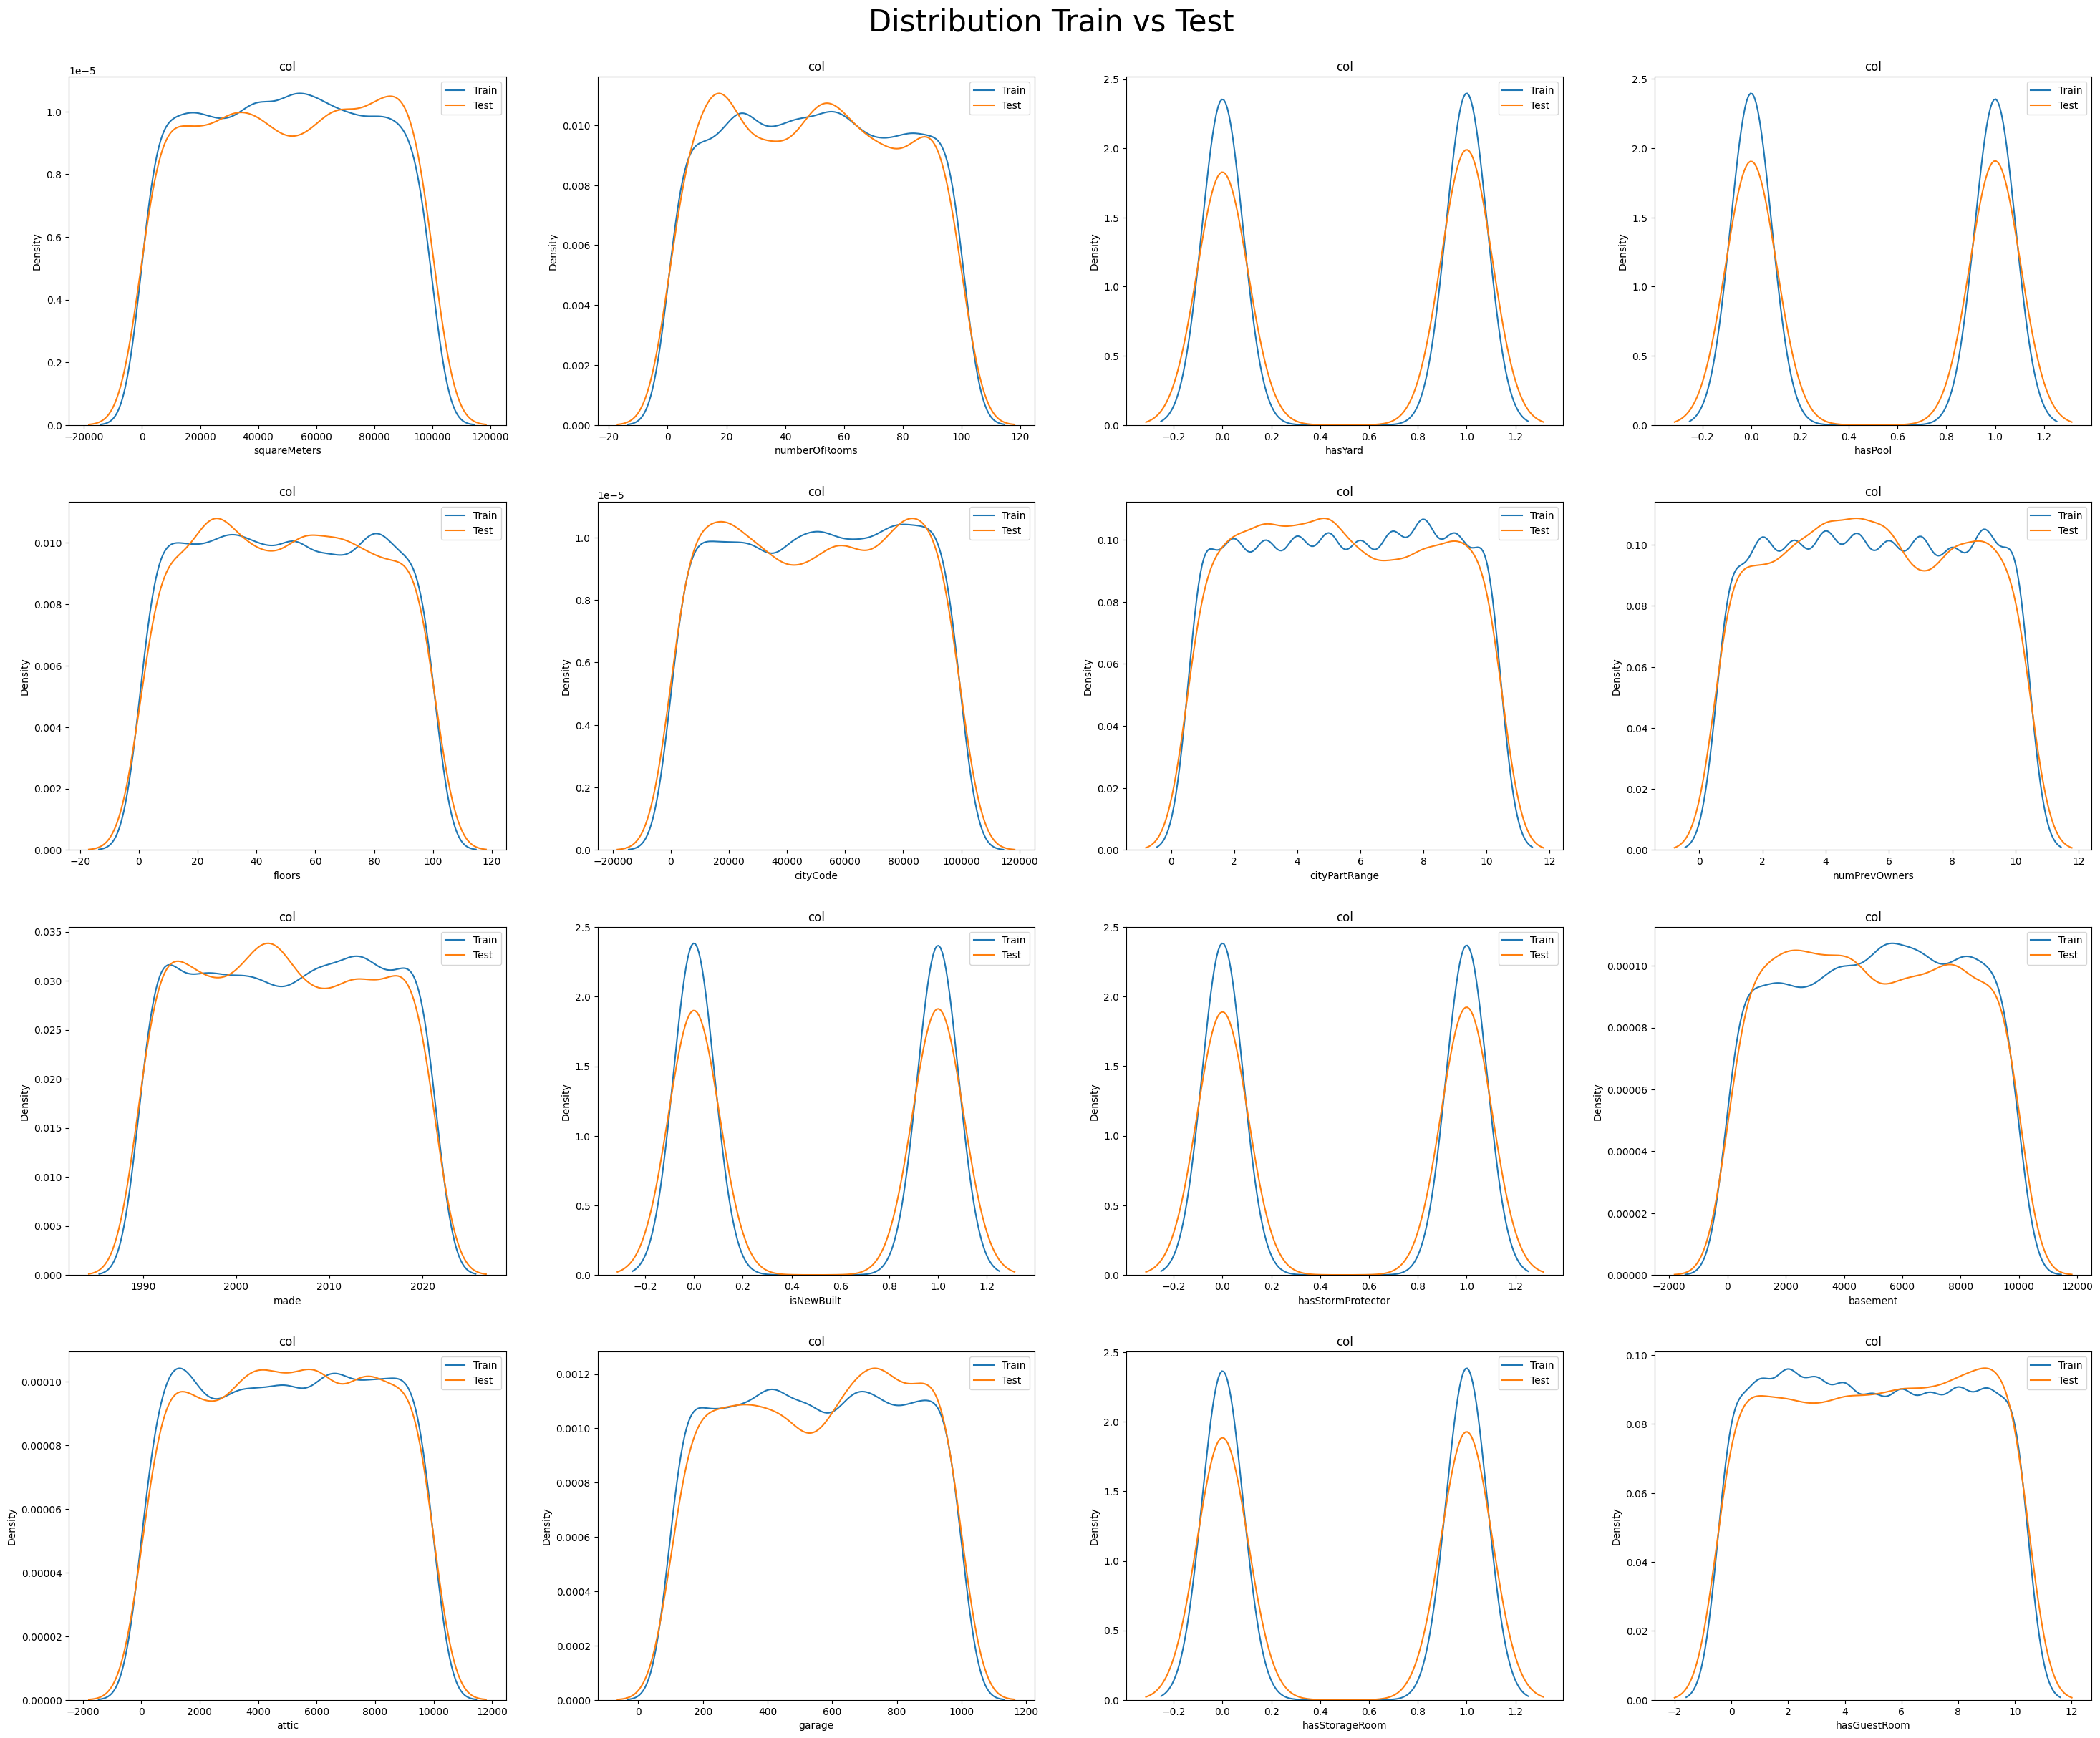

In [ ]:
fig,ax = plt.subplots(int(np.ceil(len(X_test.columns)/4)),4, figsize = (30,25))
for i,col in enumerate(X_test.columns):
    ax = np.ravel(ax)

    sns.kdeplot(x= X_train_val[col] , label = 'Train', ax = ax[i])
    sns.kdeplot(x= X_test[col], label = 'Test', ax = ax[i] )

    ax[i].legend()
    ax[i].set_title(f"col")

plt.suptitle("Distribution Train vs Test",fontsize = 30)
plt.tight_layout(pad =3)
plt.show()

In [ ]:
y.describe()

,price
count,1.000000e+04
mean,4.993448e+06
std,2.877424e+06
min,1.031350e+04
25%,2.516402e+06
50%,5.016180e+06
75%,7.469092e+06
max,1.000677e+07


In [ ]:
y_train_val.describe()

,price
count,7.500000e+03
mean,4.963730e+06
std,2.855244e+06
min,1.031350e+04
25%,2.511409e+06
50%,4.998069e+06
75%,7.399840e+06
max,9.998090e+06


In [ ]:
y_test.describe()

,price
count,2.500000e+03
mean,5.082599e+06
std,2.941739e+06
min,1.322910e+04
25%,2.531624e+06
50%,5.081645e+06
75%,7.706363e+06
max,1.000677e+07


In [ ]:
preprocess = make_column_transformer((TargetEncoder(), categorical_columns_index),(SimpleImputer(strategy="median"), continuous_columns_index))
scaling = make_column_transformer((PowerTransformer(), continuous_columns_index),remainder = "passthrough")

In [ ]:
X_train = preprocess.fit_transform(X_train_val,y_train_val)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]

theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_val)

In [ ]:
print("Intercept:", theta_best[0])
print("Coefficient:", theta_best[1:])

Intercept: [6678.11155246]
Coefficient: [[ 9.99997028e+01]
 [ 5.07274165e-01]
 [ 3.00893106e+03]
 [ 2.99268204e+03]
 [ 5.45403760e+01]
 [-9.07980641e-04]
 [ 5.18320384e+01]
 [ 1.09819628e+00]
 [-3.16480654e+00]
 [ 1.26133634e+02]
 [ 9.95708194e+01]
 [-5.13181266e-03]
 [-1.04445256e-02]
 [ 9.91540876e-02]
 [ 5.07439498e+01]
 [-7.71411654e+00]]


In [ ]:
pipe = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', LinearRegression())])

pipe.fit(X_train_val, y_train_val)
print("Intercept (scikit-learn):", pipe['regressor'].intercept_)
print("Coefficient (scikit-learn):", pipe['regressor'].coef_)

Intercept (scikit-learn): [4963730.29256]
Coefficient (scikit-learn): [[ 2.83873645e+06  1.33451470e+03  3.85449790e+03 -1.86788118e+03
  -8.53140878e+02 -1.34277071e+03  2.45216375e+03 -6.05209675e+03
  -4.34979178e+02  1.13321356e+03  4.11668025e+03 -7.10457738e+02
   2.65150063e+03 -6.41127629e+02  4.33141982e+03  6.52355960e+03]]


Linear Regression With Scaling, for the closed form solution we select cholesky or svd as solver in the ridge regression. Then we do the 4-fold cross validation.

In [ ]:
pipe1 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', LinearRegression())])
pipe2 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', Ridge(alpha=1000, solver='svd'))])
pipe3 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', Lasso(alpha= 0.02))])
pipe4 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', ElasticNet(alpha=0.001 , l1_ratio=0.5))])

pipes_LR=[pipe1,pipe2,pipe3,pipe4]
model_names_LR=["Linear Regression","Ridge Regression","Lasso Regression","Elastic Net"]
scores=[]

for i in pipes_LR:
    score = cross_val_score(i, X_train_val, y_train_val, cv=4)
    scores.append(np.mean(score))

for i in range(len(model_names_LR)):
    print("The validation score for " + model_names_LR[i] +" is " + str(scores[i]))

The validation score for Linear Regression is 0.9884924408957404
The validation score for Ridge Regression is 0.9658504735966783
The validation score for Lasso Regression is 0.9884924410815601
The validation score for Elastic Net is 0.9884922550843169


As we increase the values of alpha in ridge, lasso and elasticnet we can observe that the validation error reduces and model starts overfitiing.

In [ ]:
alpha = [0.1, 1, 10 , 100, 500]
scores = []
for i in alpha:
    pipe = Pipeline([('preprocess', preprocess), ('Scaler',scaling), ('regressor', Ridge(alpha = i, solver = 'svd'))])
    score = cross_val_score(pipe, X_train_val, y_train_val, cv=4)
    scores.append(np.mean(score))
scores

[0.9884924428258454,
 0.9884924318532194,
 0.9884895261393143,
 0.9881906226355713,
 0.9818686119873071]

In [ ]:
alpha = [0.1, 10, 100, 1000]
scores = []
for i in alpha:
    pipe = Pipeline([('preprocess', preprocess), ('Scaler',scaling), ('regressor', Lasso(alpha = i))])
    score = cross_val_score(pipe, X_train_val, y_train_val, cv=4)
    scores.append(np.mean(score))
scores

[0.9884924418281211,
 0.9884925337783853,
 0.9884933604609728,
 0.9884996438169726]

In [ ]:
alpha = [0.0001, 0.01,0.1, 1]
scores = []
for i in alpha:
    pipe = Pipeline([('preprocess', preprocess), ('Scaler',scaling), ('regressor', ElasticNet(alpha = i, l1_ratio=0.5))])
    score = cross_val_score(pipe, X_train_val, y_train_val, cv=4)
    scores.append(np.mean(score))
scores

[0.9884924447188135, 0.9884684004088748, 0.98623991161008, 0.8782567889505356]

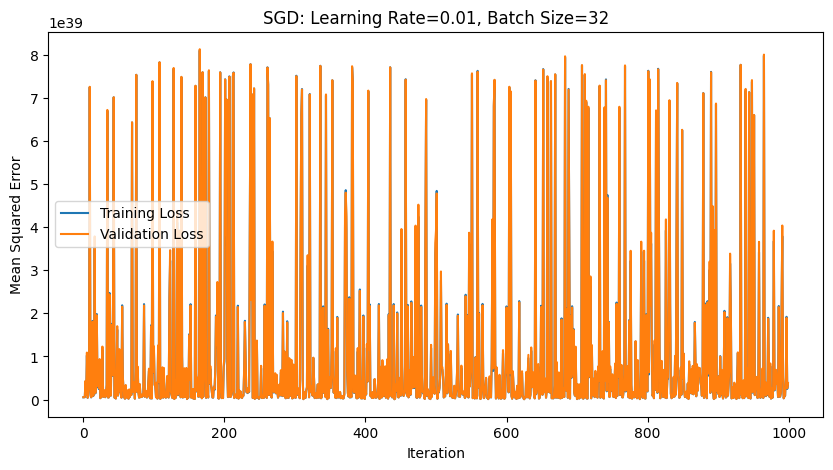

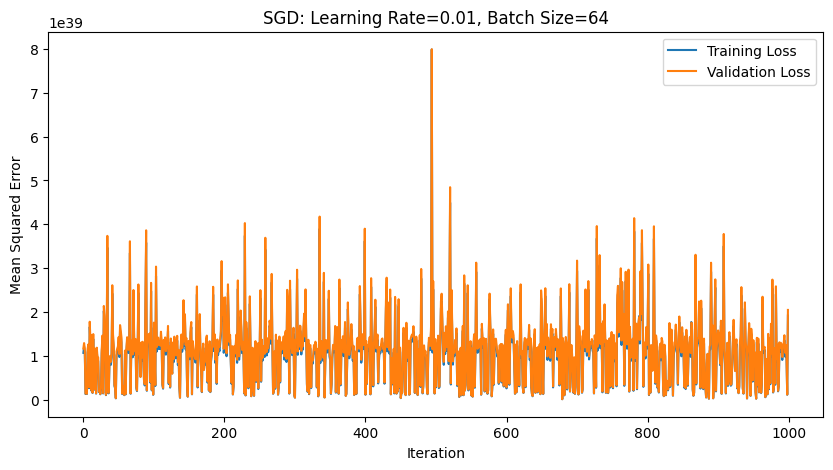

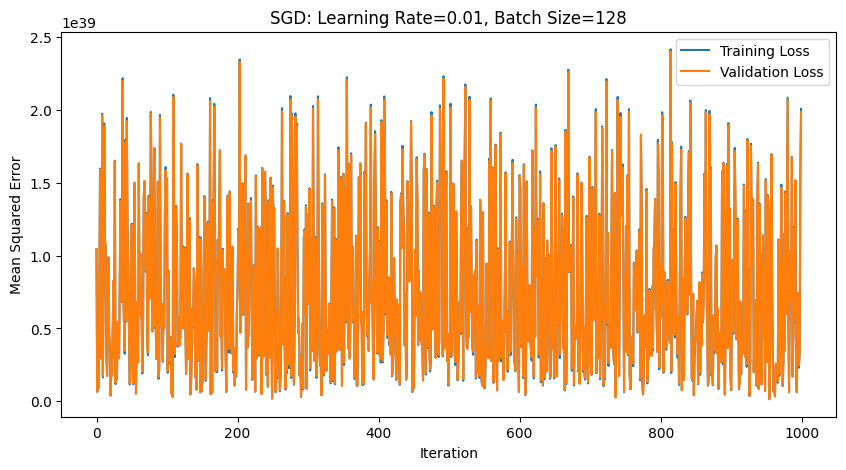

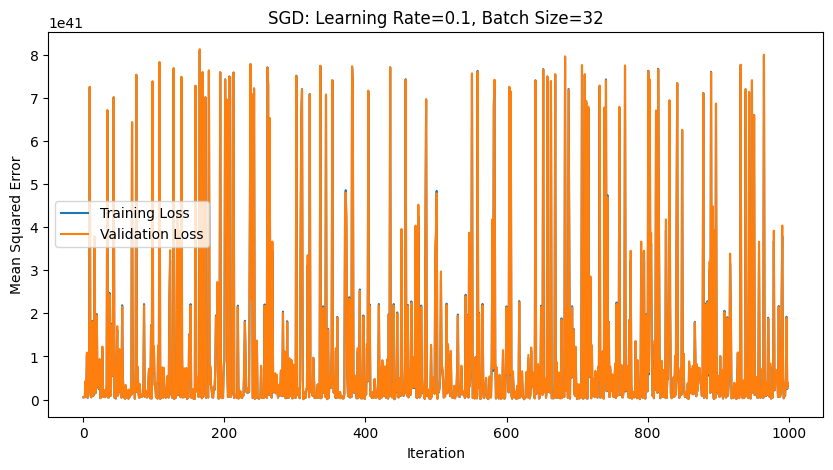

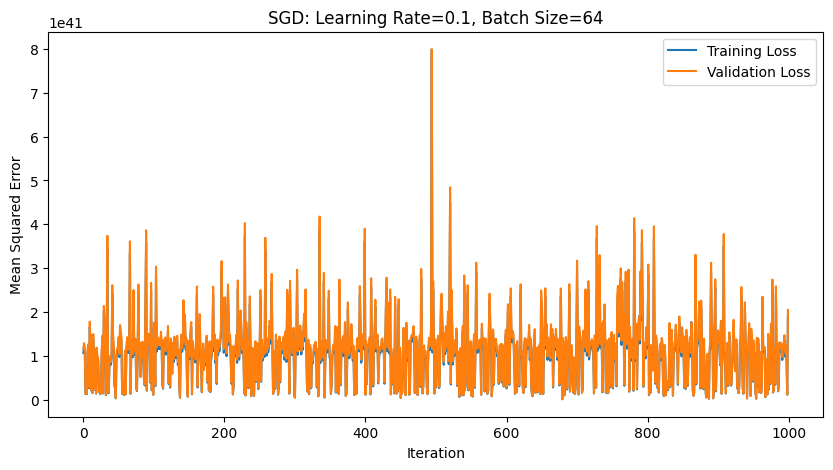

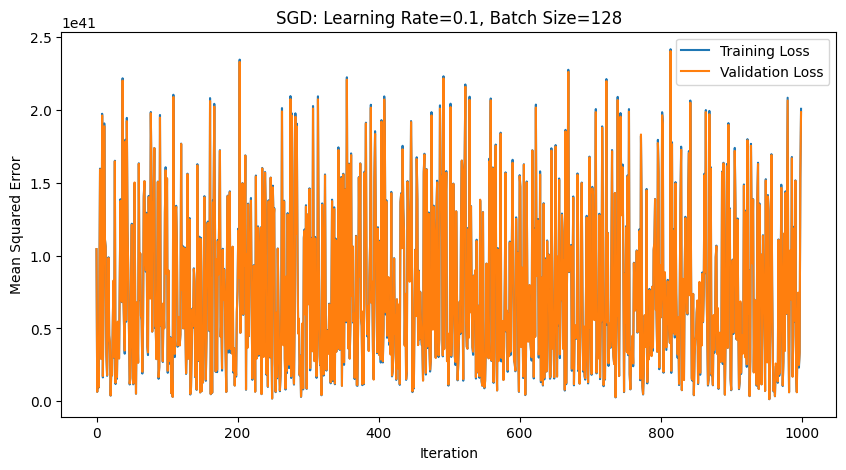

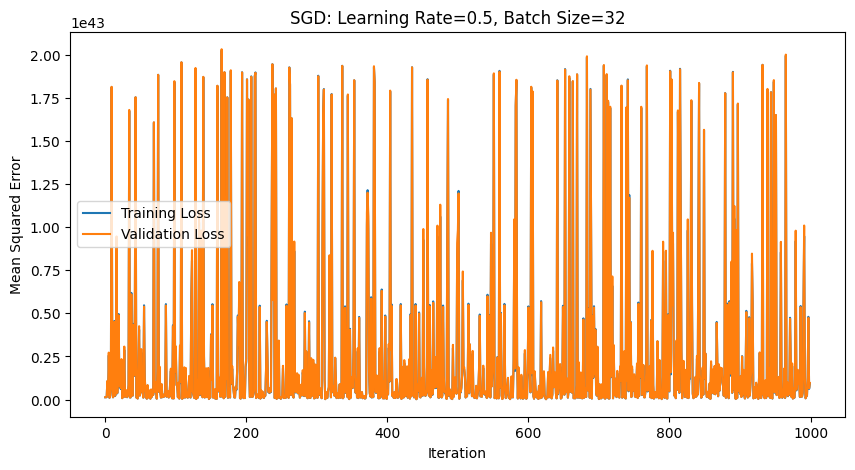

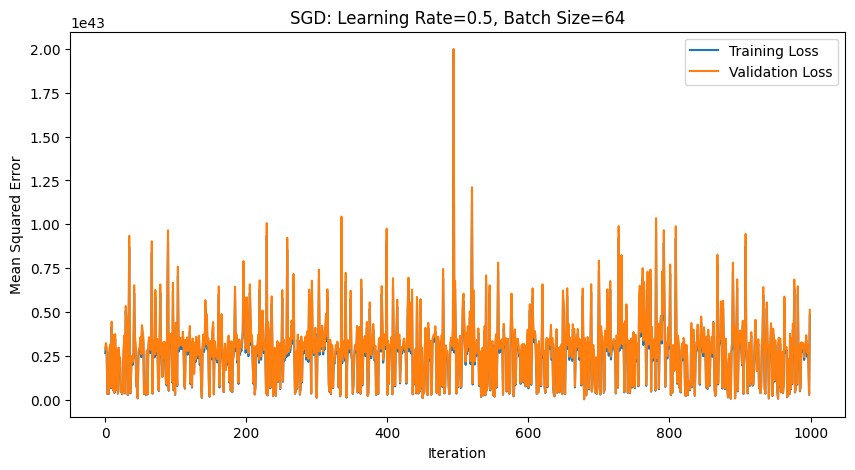

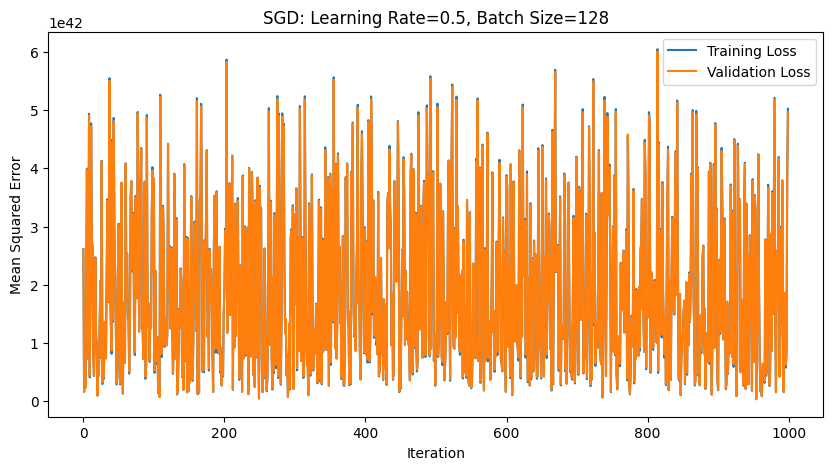

   Learning Rate  Batch Size  Final Training Loss  Final Validation Loss
0           0.01          32         3.773257e+38           3.864981e+38
1           0.01          64         1.922724e+39           2.049547e+39
2           0.01         128         2.008016e+39           1.985319e+39
3           0.10          32         3.773257e+40           3.864981e+40
4           0.10          64         1.922724e+41           2.049547e+41
5           0.10         128         2.008016e+41           1.985319e+41
6           0.50          32         9.433144e+41           9.662452e+41
7           0.50          64         4.806810e+42           5.123869e+42
8           0.50         128         5.020040e+42           4.963297e+42


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def train_and_evaluate_sgd(lr, batch_size, n_iterations, X_train, y_train, X_test, y_test):
    sgd_model = SGDRegressor(
        alpha=0.1,
        learning_rate='constant',
        eta0=lr,
        max_iter=n_iterations,
        tol=1e-3,
        penalty=None,
        random_state=42
    )

    training_losses = []
    validation_losses = []

    for _ in range(n_iterations):
        for batch_start in range(0, len(X_train), batch_size):
            X_batch = X_train[batch_start:batch_start + batch_size]
            y_batch = y_train[batch_start:batch_start + batch_size]
            sgd_model.partial_fit(X_batch, y_batch)

        # training loss
        train_loss = mean_squared_error(y_train, sgd_model.predict(X_train))
        training_losses.append(train_loss)

        # validation loss
        val_loss = mean_squared_error(y_test, sgd_model.predict(X_test))
        validation_losses.append(val_loss)

    return training_losses, validation_losses

# hyperparameters
learning_rates = [0.01, 0.1, 0.5]
batch_sizes = [32, 64, 128]
n_iterations = 1000

sgd_results = []
X_train = preprocess.fit_transform(X_train_val,y_train_val)
X_test1 = preprocess.fit_transform(X_test,y_test)
for lr in learning_rates:
    for batch_size in batch_sizes:

        training_losses, validation_losses = train_and_evaluate_sgd(
            lr, batch_size, n_iterations, X_train, y_train_val, X_test1, y_test
        )


        sgd_results.append({
            'Learning Rate': lr,
            'Batch Size': batch_size,
            'Final Training Loss': training_losses[-1],
            'Final Validation Loss': validation_losses[-1]
        })


        plt.figure(figsize=(10, 5))
        plt.plot(range(n_iterations), training_losses, label='Training Loss')
        plt.plot(range(n_iterations), validation_losses, label='Validation Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Mean Squared Error')
        plt.legend()
        plt.title(f'SGD: Learning Rate={lr}, Batch Size={batch_size}')
        plt.show()

sgd_results_df = pd.DataFrame(sgd_results)
print(sgd_results_df)

In [ ]:
pipe1 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', SGDRegressor(penalty='l2',alpha =0.1))])
pipe2 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', SGDRegressor(penalty='l1', alpha= 0.0008671230347524151))])
pipe3 = Pipeline([('preprocess', preprocess),
                  ('Scaler',scaling),
                 ('regressor', SGDRegressor(penalty='elasticnet', alpha =0.0017342460695048303, l1_ratio=0.5))])


pipes_SGD=[pipe1,pipe2,pipe3]
model_names_SGD=["SGD Regression Ridge","SGD Regression Lasso","SGD Regression Elastic Net"]
scores=[]

for i in pipes_SGD:
    score = cross_val_score(i, X_train_val, y_train_val.values.ravel(), cv=4)
    scores.append(np.mean(score))

for i in range(len(model_names_SGD)):
    print("The validation score for " + model_names_SGD[i] +" is " + str(scores[i]))

The validation score for SGD Regression Ridge is 0.9803995286701338
The validation score for SGD Regression Lasso is 0.9884716879227627
The validation score for SGD Regression Elastic Net is 0.98845804480972


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)

In [ ]:
X_train = preprocess.fit_transform(X_train_val, y_train_val)
X_train = poly_features.fit_transform(X_train,)
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]

theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_val)

In [ ]:
print("Intercept:", theta_best[0])
print("Coefficient:", theta_best[1])

Intercept: [6.28833892e+53]
Coefficient: [-1.69721295e+48]


In [ ]:
pipe = Pipeline([('preprocess', preprocess),
                 ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', LinearRegression())])

pipe.fit(X_train_val, y_train_val)
print("Intercept (scikit-learn):", pipe['regressor'].intercept_)
print("Coefficient (scikit-learn):", pipe['regressor'].coef_)

Intercept (scikit-learn): [1557230.88240711]
Coefficient (scikit-learn): [[-2.44994395e-04  5.44060625e-01  4.71185597e+00 -2.28583755e+00
  -2.85145963e+00 -2.55801863e+00 -2.14648169e-01 -4.05665724e-01
   9.23568409e+00 -1.37638460e-01 -9.53671207e-01  2.48982511e+00
  -2.21140789e+00 -5.57452286e+00 -2.86973850e-01 -3.74141696e-01
  -3.11517088e-06  4.44644256e-03 -9.50659938e-02 -4.33398392e-01
  -9.89738676e-04  8.00184185e-06  2.57168146e-02 -1.29799067e-01
   1.00082700e-01  9.17753881e-02  3.32411671e-02 -1.13367820e-04
  -2.20043793e-06  1.49427523e-03 -7.74632456e-02 -3.41106481e-02
   1.65271851e+00  5.05768703e+01 -1.11694464e+01 -2.46497725e+00
   5.31201088e-03  1.16630417e+01  1.28066605e+02 -4.17365490e-01
   9.59443985e+01 -3.39042019e+01  3.75404266e-02 -1.32969614e-03
  -5.79724026e-01 -8.21387569e+01 -7.23104709e+01  4.71674629e-03
   2.20631002e-01  2.77557428e+02 -2.09491478e-01 -3.00327847e-01
   4.83345059e-01  7.52867925e+00 -2.00548444e-02 -8.49426056e-02
  -

In [ ]:
pipe1 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', LinearRegression())])
pipe2 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', Ridge(alpha = 10))])
pipe3 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', Lasso(alpha= 0.5))])
pipe4 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', ElasticNet(alpha=0.3 , l1_ratio=0.5))])

pipes_PR=[pipe1,pipe2,pipe3,pipe4]
model_names_PR=["Linear Regression","Ridge Regression","Lasso Regression","Elastic Net"]
scores=[]

for i in pipes_PR:
    score = cross_val_score(i, X_train_val, y_train_val, cv=4)
    scores.append(np.mean(score))

for i in range(len(model_names_PR)):

    print("The validation score for " + model_names_PR[i] +" is " + str(scores[i]))

The validation score for Linear Regression is 0.9999994537001371
The validation score for Ridge Regression is 0.999999470498083
The validation score for Lasso Regression is 0.9998330905676647
The validation score for Elastic Net is 0.9998039267804093


In [ ]:
pipe1 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', SGDRegressor(penalty='l2',alpha = 0.1))])
pipe2 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', SGDRegressor(penalty='l1'))])
pipe3 = Pipeline([('preprocess', preprocess),
                  ('poly features', poly_features),
                  ('Scaler',scaling),
                 ('regressor', SGDRegressor(penalty='elasticnet', l1_ratio=0.5, alpha= 0.0000001))])


pipes_PR_SGD=[pipe1,pipe2,pipe3]
model_names_PR_SGD=["SGD Regression Ridge","SGD Regression Lasso","SGD Regression Elastic Net"]
scores=[]

for i in pipes_PR_SGD:
    score = cross_val_score(i, X_train_val, y_train_val.values.ravel(), cv=4)
    scores.append(np.mean(score))

for i in range(len(model_names_PR_SGD)):
    print("The validation score for " + model_names_PR_SGD[i] +" is " + str(scores[i]))

The validation score for SGD Regression Ridge is -6.744876539112394e+62
The validation score for SGD Regression Lasso is -1.2740018803127373e+63
The validation score for SGD Regression Elastic Net is -6.489618352206802e+62


In [ ]:
for i in pipes_LR:
    i.fit(X_train_val, y_train_val)
    y_predict = i.predict(X_test)
    R2 = r2_score(y_test, y_predict)
    print(R2)

0.9887500322879765
0.9741564902531363
0.9887500323305276
0.988745832760521


In [ ]:
for i in pipes_SGD:
    i.fit(X_train_val, y_train_val)
    y_predict = i.predict(X_test)
    R2 = r2_score(y_test, y_predict)
    print(R2)

0.9798478433362701
0.9886903141472051
0.9887058839635415


In [ ]:
for i in pipes_PR:
    i.fit(X_train_val, y_train_val)
    y_predict = i.predict(X_test)
    R2 = r2_score(y_test, y_predict)
    print(R2)


0.9999995260028668
0.9999995270011345
0.9998437329861399
0.9998243773434706


# **Results**
The polynomial regression performs better than the linear regression.

**For Linear Regression**
* RMSE and R2 score for 4-fold validation
is 0.98 and 0.98.
*In addition, we regulated the model with Ridge, Lasso, ElasticNet with different values alpha.
*We also performed SGD with different learning rate and batch sizes for 100 iter

**For Polynomial Regression**
* We used 3rd degree polynomial with rmse values and r2 scores being 0.98 and 0.99
* In addition, we regulated the model with Ridge, Lasso, ElasticNet with different values of alpha.


---

References:

[Kaggle](https:/www.kaggle.com/)

[Dataset Paris House](https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction/data)

[Sci-kit Learn Doc](https://scikit-learn.org/)

[StatsExchange](https://https://stats.stackexchange.com/questions/187335/validation-error-less-than-training-error#:~:text=Simply%20put%2C%20if%20training%20loss,computed%20on%20the%20validation%20set.)

